<a href="https://colab.research.google.com/github/ayandalab/Chess-EndGame/blob/main/ML_USTLD_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MLP with automatic validation set
import pandas
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import math 
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [ ]:
dataframe = pandas.read_excel('Test1 (1).xlsx') 
dataframe.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Fitness
0,10,0,4,14,3,2,15,13,9,7,5,12,11,1,6,8,4.0
1,5,6,7,8,4,0,9,15,1,2,13,10,12,3,11,14,4.0
2,2,12,5,13,10,0,3,4,11,8,14,9,1,15,6,7,4.0
3,6,12,7,14,15,9,8,4,0,5,13,10,11,2,3,1,4.0
4,5,14,8,2,15,4,6,12,13,11,10,1,9,0,7,3,4.0


In [ ]:
# split into input (X) and output (Y) variables
X = np.array(dataframe.drop(['Fitness'],1)) #.astype(int)
#X = np.array(dataframe.drop(['Friquency','Tx Height','AoA','Path Loss'],1))

# Assigning the target data into (y)

y = np.array(dataframe['Fitness'])
X.shape, y.shape

((10113, 16), (10113,))

In [ ]:
#spilit data 
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8090, 16), (8090,), (2023, 16), (2023,))

In [ ]:
from sklearn.svm import SVR
model =SVR(kernel='rbf', degree=10, gamma=0.01, C=4.74449041131298)

kf = KFold(n_splits=7, random_state=30, shuffle=True)
scores = []
r_square = []
rmse = []
MAPE = []
mse = []
corr = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores.append(round(test_score, 6))
    
    y_pred = model.predict(X_test)
    
        
    from sklearn.metrics import mean_squared_error
    
    ### Test Data RMSE
    rmse_prediction = math.sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(round(rmse_prediction, 4))
    
    from sklearn.metrics import mean_absolute_percentage_error
    
    MAPE_value = mean_absolute_percentage_error(y_pred,y_test)
    MAPE.append(round(MAPE_value,4))
    
    mse_value = mean_squared_error(y_test,y_pred)
    mse.append(round(mse_value,4))
    
    '''Running the example calculates and prints the Pearson’s correlation coefficient.
            We can see that the two variables are positively correlated and that the correlation is 0.8.
            This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.'''
    
    from scipy.stats import pearsonr
    corr_value, _ = pearsonr(y_test, y_pred)
    corr.append(round(corr_value,4))

    
print('R^2 Square:', scores)
print(min(scores), round(np.mean(scores),4), max(scores))

print('Root Mean Square Error:', rmse)
print(min(rmse), round(np.mean(rmse),4), max(rmse))

print('Mean Absolute Percentage Error:', MAPE)
print(min(MAPE), round(np.mean(MAPE),4), max(MAPE))

print('Mean Square Error:',mse)
print(min(mse), round(np.mean(mse),4), max(mse))

print('Pearsons correlation:', corr)
print(min(corr), round(np.mean(corr),4), max(corr))


R^2 Square: [0.905955, 0.948339, 0.847555, 0.841317, 0.894744, 0.713304, 0.827168]
0.713304 0.8541 0.948339
Root Mean Square Error: [0.1223, 0.1242, 0.1642, 0.1436, 0.1478, 0.1748, 0.1704]
0.1223 0.1496 0.1748
Mean Absolute Percentage Error: [0.016, 0.0159, 0.0171, 0.0173, 0.0166, 0.018, 0.0177]
0.0159 0.0169 0.018
Mean Square Error: [0.0149, 0.0154, 0.027, 0.0206, 0.0218, 0.0305, 0.0291]
0.0149 0.0228 0.0305
Pearsons correlation: [0.9528, 0.9743, 0.9236, 0.9198, 0.9467, 0.8516, 0.9119]
0.8516 0.9258 0.9743


<function matplotlib.pyplot.show>

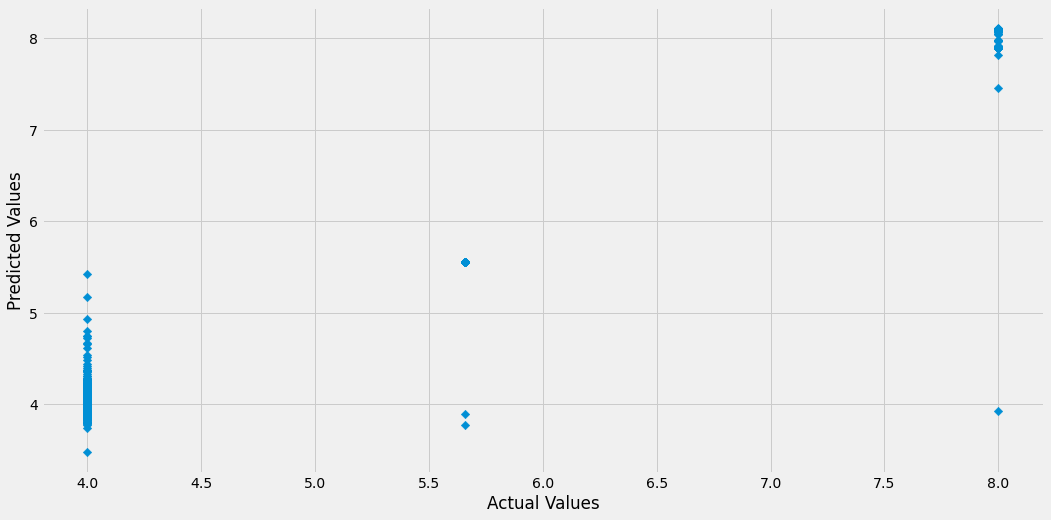

In [ ]:
#spilit data 
from sklearn.model_selection import train_test_split

pred = model.predict(X)
pred_svr = model.predict(X_test)

import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y,pred, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('svr_img1.png', dpi=500,bbox_inches='tight')
plt.show
#plt.title('Path Loss')

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(y_test, label = 'Measured Data', color='lightcoral', marker='D', markeredgecolor='black')
plt.plot(y_pred, label = 'Predicted Data', color='#4b0082', linewidth=6,
         linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('svr_img2.png', dpi=500, bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot((y_test - y_pred), color='#4b0082', marker='D', markeredgecolor='black')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Prediction Error (dB)')
plt.xticks(rotation=45)
plt.savefig('svr_img3.jpg', dpi=500, bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(abs(y_test - y_pred), color='#2ca02c', marker='D', markeredgecolor='black')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Absolute Prediction Error (dB)')
plt.xticks(rotation=45)
plt.savefig('svr_img4.png', dpi=500, bbox_inches='tight')
plt.show()

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('svr_img5.png', dpi=500,bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = DecisionTreeRegressor(criterion= 'mse', max_depth= 56.81487453498418, max_features= 'log2', min_samples_leaf= 2, splitter= 'best')

kf = KFold(n_splits=7, random_state=30, shuffle=True)
scores = []
r_square = []
rmse = []
MAPE = []
mse = []
corr = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    # fit the model with the training data
    model.fit(X_train,y_train)
    test_score = model.score(X_test, y_test)
    scores.append(round(test_score, 4))
    
    y_pred = model.predict(X_test)
    
    r = r2_score(y_pred,y_test)
    r_square.append(round(r, 4))
    
    from sklearn.metrics import mean_squared_error
    ### Test Data RMSE
    rmse_prediction = math.sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(round(rmse_prediction, 4))
    
    from sklearn.metrics import mean_absolute_percentage_error
   
    MAPE_value = mean_absolute_percentage_error(y_pred,y_test)
    MAPE.append(round(MAPE_value,4))
    
    mse_value = mean_squared_error(y_test,y_pred)
    mse.append(round(mse_value,4))
    
    '''Running the example calculates and prints the Pearson’s correlation coefficient.
            We can see that the two variables are positively correlated and that the correlation is 0.8.
            This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.'''
    
    from scipy.stats import pearsonr
    corr_value, _ = pearsonr(y_test, y_pred)
    corr.append(round(corr_value,4))


print('R^2 Square:', scores)
print(min(scores), round(np.mean(scores),4), max(scores))
print('R^2 Square:', r_square)
print(min(r_square), round(np.mean(r_square),4), max(r_square))

print('Root Mean Square Error:', rmse)
print(min(rmse), round(np.mean(rmse),4), max(rmse))

print('Mean Absolute Percentage Error:', MAPE)
print(min(MAPE), round(np.mean(MAPE),4), max(MAPE))

print('Mean Square Error:',mse)
print(min(mse), round(np.mean(mse),4), max(mse))

print('Pearsons correlation:', corr)
print(min(corr), round(np.mean(corr),4), max(corr))


In [ ]:
#spilit data 
from sklearn.model_selection import train_test_split

pred = model.predict(X)
pred_dt = model.predict(X_test)

import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y,pred, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('dt_img1.png', dpi=500,bbox_inches='tight')
plt.show
#plt.title('Path Loss')

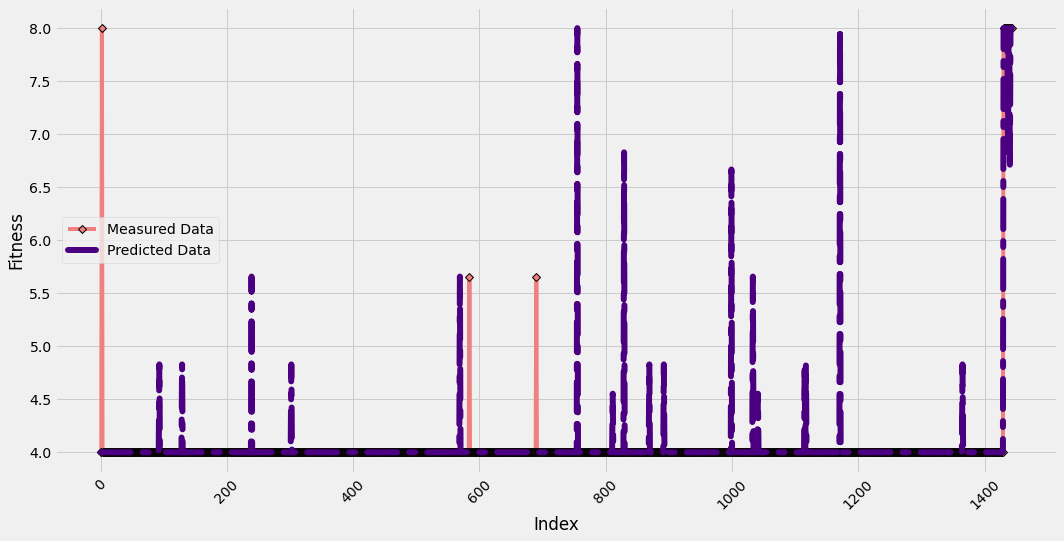

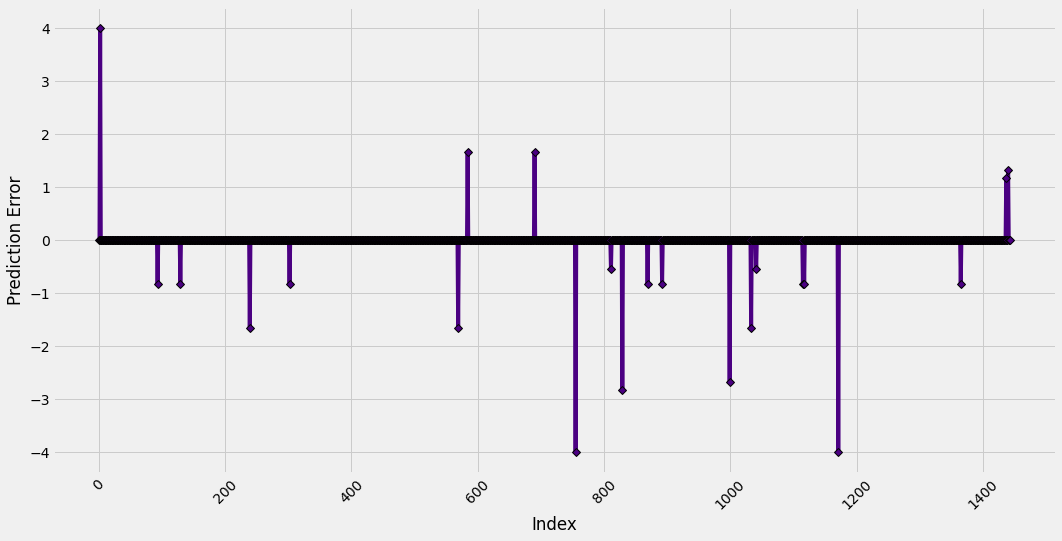

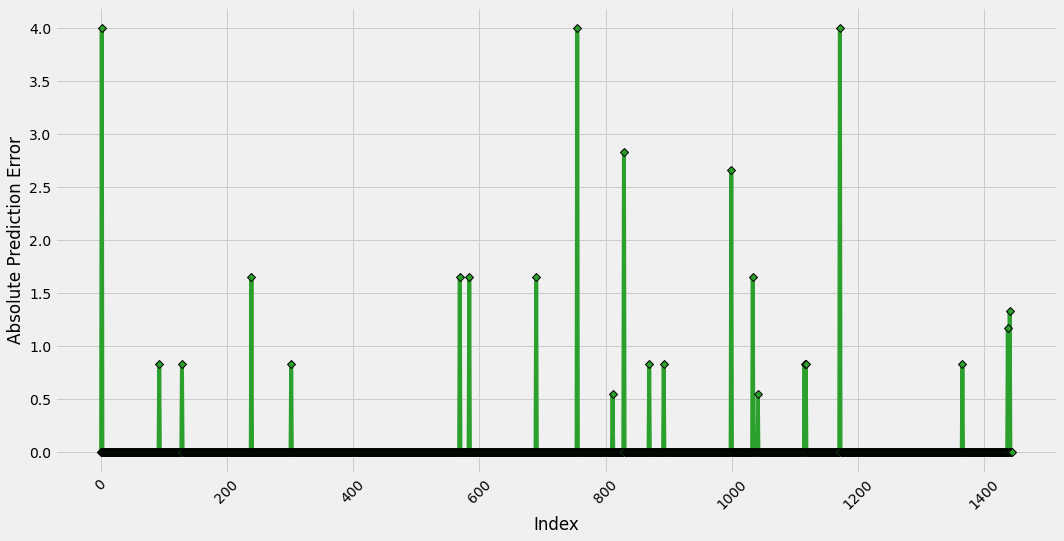

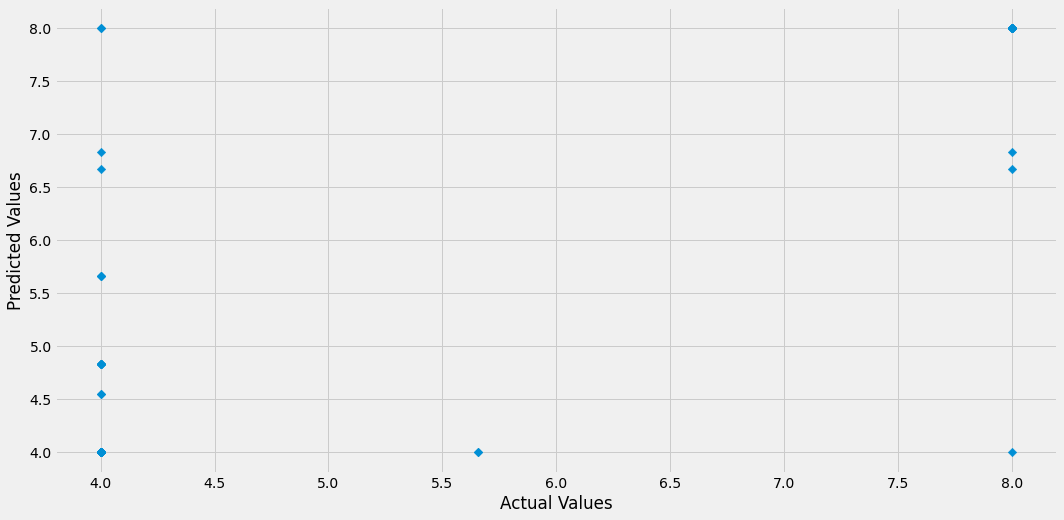

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(y_test, label = 'Measured Data', color='lightcoral', marker='D', markeredgecolor='black')
plt.plot(y_pred, label = 'Predicted Data', color='#4b0082', linewidth=6,
         linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Fitness')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('dt_img2.png', dpi=500, bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot((y_test - y_pred), color='#4b0082', marker='D', markeredgecolor='black')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Prediction Error')
plt.xticks(rotation=45)
plt.savefig('dt_img3.png', dpi=500, bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(abs(y_test - y_pred), color='#2ca02c', marker='D', markeredgecolor='black')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Absolute Prediction Error')
plt.xticks(rotation=45)
plt.savefig('dt_img4.png', dpi=500, bbox_inches='tight')
plt.show()

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('dt_img5.png', dpi=500,bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor(n_estimators= 1610, max_depth= 38.192486612149345, max_features= 'log2', min_samples_split= 2, min_samples_leaf= 1) 

kf = KFold(n_splits=7, random_state=30, shuffle=True)
scores = []
r_square = []
rmse = []
MAPE = []
mse = []
corr = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    # fit the model with the training data
    model.fit(X_train,y_train)
    test_score = model.score(X_test, y_test)
    scores.append(round(test_score, 4))
    
    y_pred = model.predict(X_test)
    
    
    from sklearn.metrics import mean_squared_error
    ### Test Data RMSE
    rmse_prediction = math.sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(round(rmse_prediction, 4))
    
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.utils.validation import check_consistent_length, check_array
    MAPE_value = mean_absolute_percentage_error(y_pred,y_test)
    MAPE.append(round(MAPE_value,4))
    
    mse_value = mean_squared_error(y_test,y_pred)
    mse.append(round(mse_value,4))
    
    '''Running the example calculates and prints the Pearson’s correlation coefficient.
            We can see that the two variables are positively correlated and that the correlation is 0.8.
            This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.'''
    
    from scipy.stats import pearsonr
    corr_value, _ = pearsonr(y_test, y_pred)
    corr.append(round(corr_value,6))

print('Number of Trees used : ', model.n_estimators)
print('R^2 Square:', scores)
print(min(scores), round(np.mean(scores),4), max(scores))

print('Root Mean Square Error:', rmse)
print(min(rmse), round(np.mean(rmse),4), max(rmse))

print('Mean Absolute Percentage Error:', MAPE)
print(min(MAPE), round(np.mean(MAPE),4), max(MAPE))

print('Mean Square Error:',mse)
print(min(mse), round(np.mean(mse),4), max(mse))

print('Pearsons correlation:', corr)
print(min(corr), round(np.mean(corr),4), max(corr))


In [ ]:
#spilit data 
from sklearn.model_selection import train_test_split

pred = model.predict(X)
pred_rf = model.predict(X_test)

import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y,pred, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('rf_img1.png', dpi=500,bbox_inches='tight')
plt.show()
#plt.title('Path Loss')

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(y_test, label = 'Measured Data', color='lightcoral', marker='D', markeredgecolor='black')
plt.plot(y_pred, label = 'Predicted Data', color='#4b0082', linewidth=6,
         linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Fitness')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('rf_img2.png', dpi=500, bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot((y_test - y_pred), color='#4b0082', marker='D', markeredgecolor='black')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Prediction Error')
plt.xticks(rotation=45)
plt.savefig('rf_img3.png', dpi=500, bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(abs(y_test - y_pred), color='#2ca02c', marker='D', markeredgecolor='black')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Absolute Prediction Error')
plt.xticks(rotation=45)
plt.savefig('rf_img4.png', dpi=500, bbox_inches='tight')
plt.show()

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('rf_img5.png', dpi=500,bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

model = KNeighborsRegressor(algorithm= 'kd_tree', leaf_size= 41.19722780530735, weights= 'distance', n_neighbors= 25)    

kf = KFold(n_splits=7, random_state=30, shuffle=True)
scores = []
r_square = []
rmse = []
MAPE = []
mse = []
corr = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    # fit the model with the training data
    model.fit(X_train,y_train)
    test_score = model.score(X_test, y_test)
    scores.append(round(test_score, 4))
    
    y_pred = model.predict(X_test)
    
    
    
    from sklearn.metrics import mean_squared_error
    ### Test Data RMSE
    rmse_prediction = math.sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(round(rmse_prediction, 4))
    
    from sklearn.metrics import mean_absolute_percentage_error
   
    MAPE_value = mean_absolute_percentage_error(y_pred,y_test)
    MAPE.append(round(MAPE_value,4))
    
    mse_value = mean_squared_error(y_test,y_pred)
    mse.append(round(mse_value,4))
    
    '''Running the example calculates and prints the Pearson’s correlation coefficient.
            We can see that the two variables are positively correlated and that the correlation is 0.8.
            This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.'''
    
    from scipy.stats import pearsonr
    corr_value, _ = pearsonr(y_test, y_pred)
    corr.append(round(corr_value,4))

print('R^2 Square:', scores)
print(min(scores), round(np.mean(scores),4), max(scores))

print('Root Mean Square Error:', rmse)
print(min(rmse), round(np.mean(rmse),4), max(rmse))

print('Mean Absolute Percentage Error:', MAPE)
print(min(MAPE), round(np.mean(MAPE),4), max(MAPE))

print('Mean Square Error:',mse)
print(min(mse), round(np.mean(mse),4), max(mse))

print('Pearsons correlation:', corr)
print(min(corr), round(np.mean(corr),4), max(corr))


In [ ]:
#spilit data 
from sklearn.model_selection import train_test_split

pred = model.predict(X)
pred_knn = model.predict(X_test)

import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y,pred, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('knn_img1.png', dpi=500,bbox_inches='tight')
plt.show()
#plt.title('Path Loss')

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(y_test, label = 'Measured Data', color='lightcoral', marker='D', markeredgecolor='black')
plt.plot(y_pred, label = 'Predicted Data', color='#4b0082', linewidth=6,
         linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Fitness')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('knn_img2.png', dpi=500, bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot((y_test - y_pred), color='#4b0082', marker='D', markeredgecolor='black')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Prediction Error')
plt.xticks(rotation=45)
plt.savefig('knn_img3.png', dpi=500, bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(abs(y_test - y_pred), color='#2ca02c', marker='D', markeredgecolor='black')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Absolute Prediction Error')
plt.xticks(rotation=45)
plt.savefig('knn_img4.png', dpi=500, bbox_inches='tight')
plt.show()

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('knn_img5.png', dpi=500,bbox_inches='tight')
plt.show()

In [ ]:
model = LinearRegression(n_jobs = 100)
kf = KFold(n_splits=7, random_state=30, shuffle=True)
scores = []
r_square = []
rmse = []
MAPE = []
mse = []
corr = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores.append(round(test_score, 4))
    
    y_pred = model.predict(X_test)
    
    #r = r2_score(y_pred.reshape(-1,1),y_test)
    #r_square.append(round(r, 6))
    
    #from sklearn.metrics import mean_squared_error
    ### Test Data RMSE
    rmse_prediction = math.sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(round(rmse_prediction, 4))
    
    from sklearn.metrics import mean_absolute_percentage_error
    #from sklearn.utils.validation import check_consistent_length, check_array
    
    MAPE_value = mean_absolute_percentage_error(y_pred,y_test)
    MAPE.append(round(MAPE_value,4))
    
    mse_value = mean_squared_error(y_test,y_pred)
    mse.append(round(mse_value,4))
    
    '''Running the example calculates and prints the Pearson’s correlation coefficient.
            We can see that the two variables are positively correlated and that the correlation is 0.8.
            This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.'''
    
    from scipy.stats import pearsonr
    
    corr_value, _ = pearsonr(y_test, y_pred)
    corr.append(round(corr_value,6))

    
print('R^2 Square:', scores)
print(min(scores), round(np.mean(scores),4), max(scores))

print('Root Mean Square Error:', rmse)
print(min(rmse), round(np.mean(rmse),4), max(rmse))

print('Mean Absolute Percentage Error:', MAPE)
print(min(MAPE), round(np.mean(MAPE),4), max(MAPE))

print('Mean Square Error:',mse)
print(min(mse), round(np.mean(mse),4), max(mse))

print('Pearsons correlation:', corr)
print(min(corr), round(np.mean(corr),4), max(corr))


In [ ]:
import matplotlib.pyplot as plt 
pred = model.predict(X)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y,pred, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('mlr_img1.png', dpi=200,bbox_inches='tight')
plt.show
#plt.title('Path Loss')

In [ ]:
#import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(y_test, label = 'Measured Data', color='lightcoral', marker='D', markeredgecolor='black')
plt.plot(y_pred, label = 'Predicted Data', color='#4b0082', linewidth=6,
         linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
plt.xlabel('Index')
plt.ylabel('Fitness')
plt.legend()
#plt.xticks(rotation=45)
plt.savefig('mlr_img2.png', dpi=500,bbox_inches='tight')
plt.show()

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot((y_test - y_pred), color='#4b0082', marker='D', markeredgecolor='black')
plt.xlabel('Index')
plt.ylabel('Prediction Error')
plt.xticks(rotation=45)
plt.savefig('mlr_img3.png', dpi=500, bbox_inches='tight')
plt.show()

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(abs(y_test - y_pred), color='#2ca02c', marker='D', markeredgecolor='black')
plt.xlabel('Index')
plt.ylabel('Absolute Prediction Error')
plt.xticks(rotation=45)
plt.savefig('mlr_img4.png', dpi=500,bbox_inches='tight')
plt.show()

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig('mlr_img5.png', dpi=500,bbox_inches='tight')
plt.show
#plt.title('Path Loss')

